___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

2023-04-27 10:08:09.512135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU support is enabled for this session.


# Recognizing and Understanding Data

In [5]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 50000 images in the training dataset
There are 10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [8]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

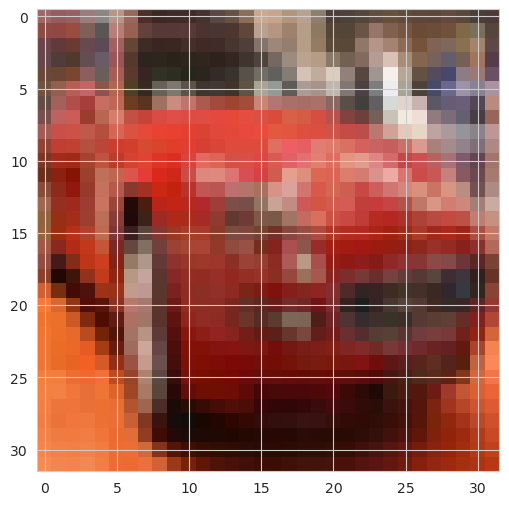

In [9]:
plt.imshow(X_train[5])
plt.show()

In [10]:
y_train[5]

array([1], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [14]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
classes[y_train[0][0]]

'frog'

In [17]:
classes[int(y_train[0])]

'frog'

In [18]:
# int(np.random.randint(low=0, high=50000, size=1))

In [19]:
# X_train[int(np.random.randint(low=0, high=50000, size=1))]

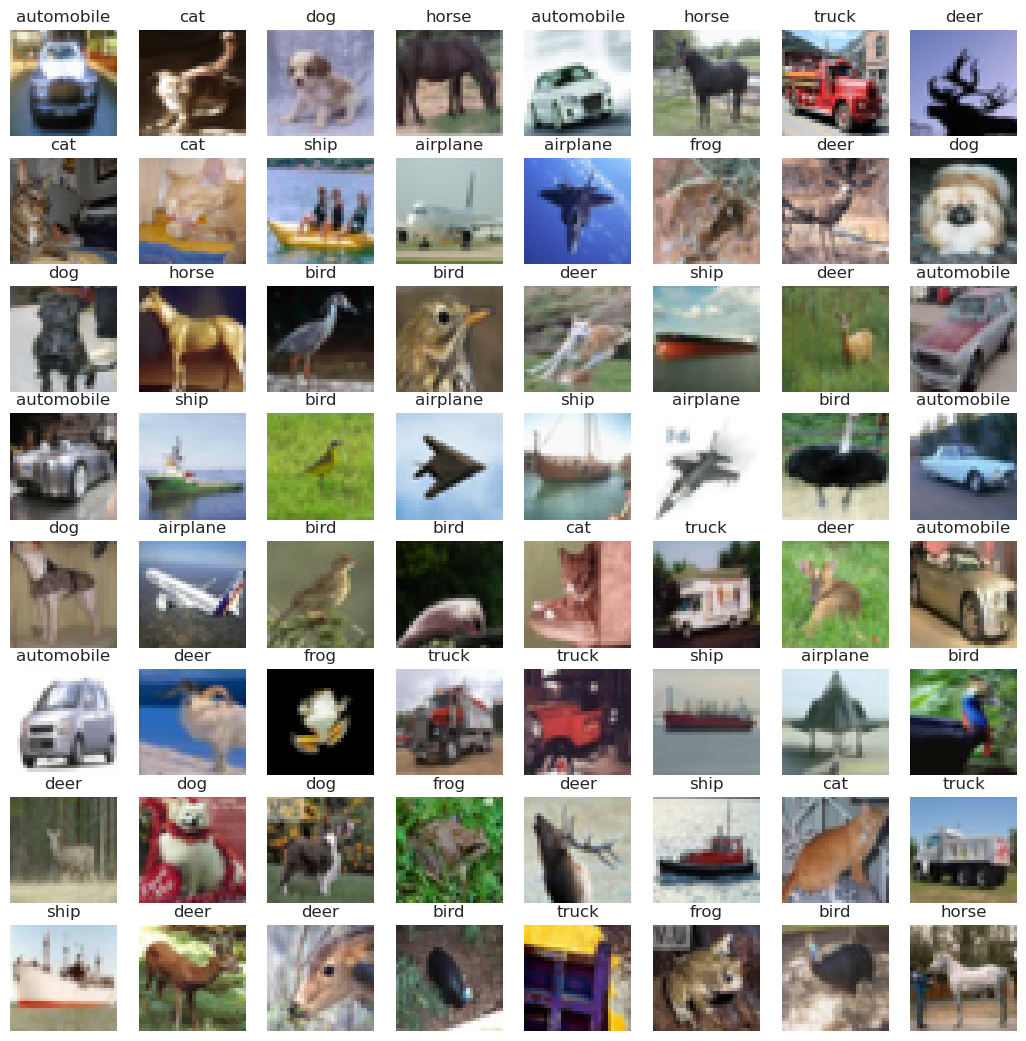

In [20]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

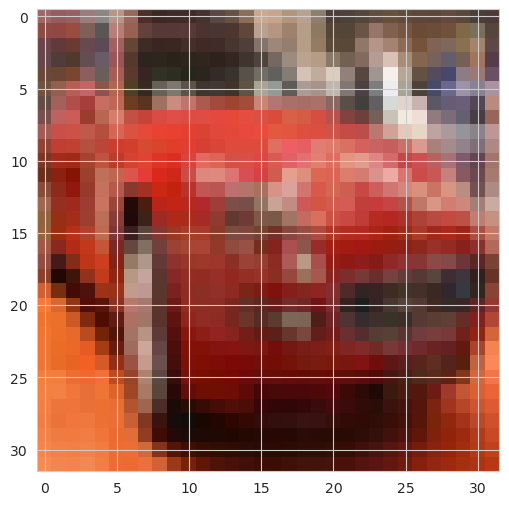

In [26]:
plt.imshow(X_train[5])
plt.show()

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
y_train[0]

array([6], dtype=uint8)

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
48 * (3 * 3 * 32 + 1)

13872

In [35]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        input_shape=(32, 32, 3),
        activation="relu",
        padding="same",
    )
)
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [39]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1563/1563 [==============================] - 15s 7ms/step - loss: 1.3960 - accuracy: 0.4977 - val_loss: 1.1120 - val_accuracy: 0.6098
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0321 - accuracy: 0.6366 - val_loss: 0.9962 - val_accuracy: 0.6589
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8904 - accuracy: 0.6878 - val_loss: 0.8909 - val_accuracy: 0.6909
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7958 - accuracy: 0.7219 - val_loss: 0.8873 - val_accuracy: 0.6964
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7158 - accuracy: 0.7502 - val_loss: 0.8586 - val_accuracy: 0.7017
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6438 - accuracy: 0.7731 - val_loss: 0.8809 - val_accuracy: 0.6969
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5856 - accuracy: 0.7936 - val_loss: 0.8910 - val_ac

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.396,0.498,1.112,0.610
1,1.032,0.637,0.996,0.659
2,0.890,0.688,0.891,0.691
3,0.796,0.722,0.887,0.696
4,0.716,0.750,0.859,0.702
5,0.644,0.773,0.881,0.697
6,0.586,0.794,0.891,0.706


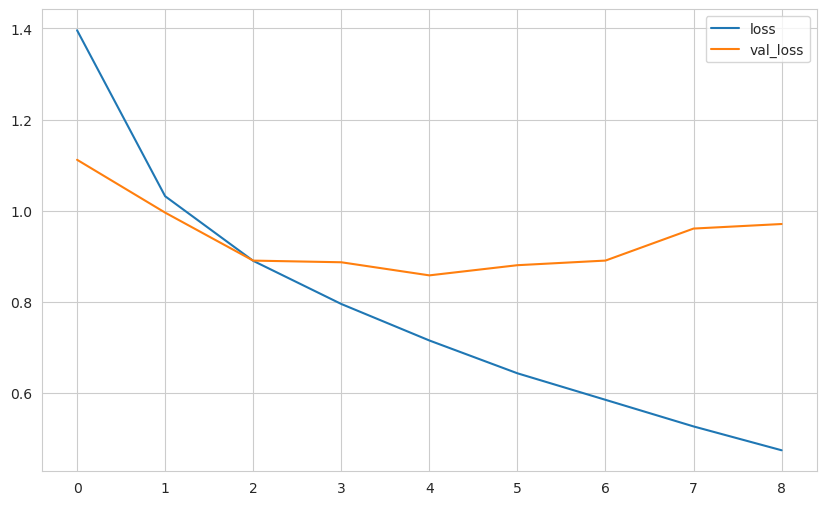

In [42]:
summary[["loss", "val_loss"]].plot()
plt.show()

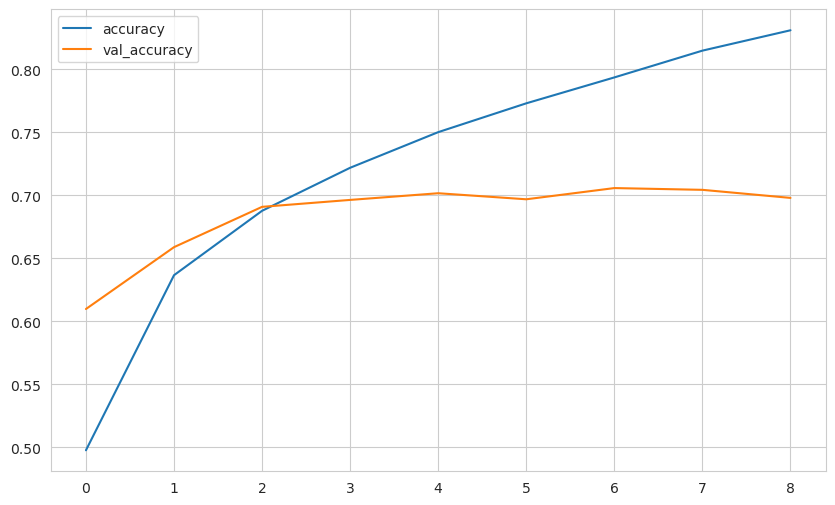

In [43]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8586 - accuracy: 0.7017


[0.8585682511329651, 0.70169997215271]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8585682511329651
Test accuracy: 0.70169997215271


In [47]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[5.9371797e-04, 1.4170747e-02, 6.9674331e-04, ..., 4.1579056e-04,
        1.9275254e-03, 1.2372786e-04],
       [1.0029180e-02, 3.0559629e-02, 2.0221837e-06, ..., 7.3670292e-09,
        9.5904034e-01, 3.6629051e-04],
       [1.4640872e-01, 1.9108030e-01, 1.1763500e-02, ..., 5.6522118e-04,
        5.8816576e-01, 4.1278571e-02],
       ...,
       [6.5887772e-04, 4.1573605e-04, 2.5116321e-02, ..., 7.5857481e-03,
        2.7454522e-04, 5.0486597e-05],
       [5.8386620e-02, 4.5108202e-01, 1.9377381e-01, ..., 2.8390840e-03,
        1.8734124e-03, 1.9641759e-02],
       [9.0319763e-06, 5.4060441e-05, 2.2651914e-04, ..., 9.2316139e-01,
        8.2096194e-06, 3.8316168e-05]], dtype=float32)

In [48]:
y_pred = np.argmax(pred_prob, axis=1)

In [49]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.78      0.85      0.82      1000
           2       0.64      0.53      0.58      1000
           3       0.53      0.51      0.52      1000
           4       0.63      0.67      0.65      1000
           5       0.56      0.65      0.60      1000
           6       0.81      0.75      0.78      1000
           7       0.82      0.70      0.76      1000
           8       0.81      0.78      0.80      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [51]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
print(confusion_matrix(y_test, y_pred))

[[774  30  34  18  19   8  12   9  50  46]
 [ 12 855   6   6   0   5   8   0  25  83]
 [ 79   8 525  68 130  89  47  28  15  11]
 [ 23  23  61 513  54 205  45  22  25  29]
 [ 25   7  47  79 671  61  32  55  15   8]
 [ 15   5  39 163  47 651  18  29  18  15]
 [  5   6  53  65  50  54 748   1   6  12]
 [ 17  10  42  39  72  77   6 699   7  31]
 [ 96  47   9  11  10   7   5   1 780  34]
 [ 32 102   9  11   4  11   4   6  20 801]]


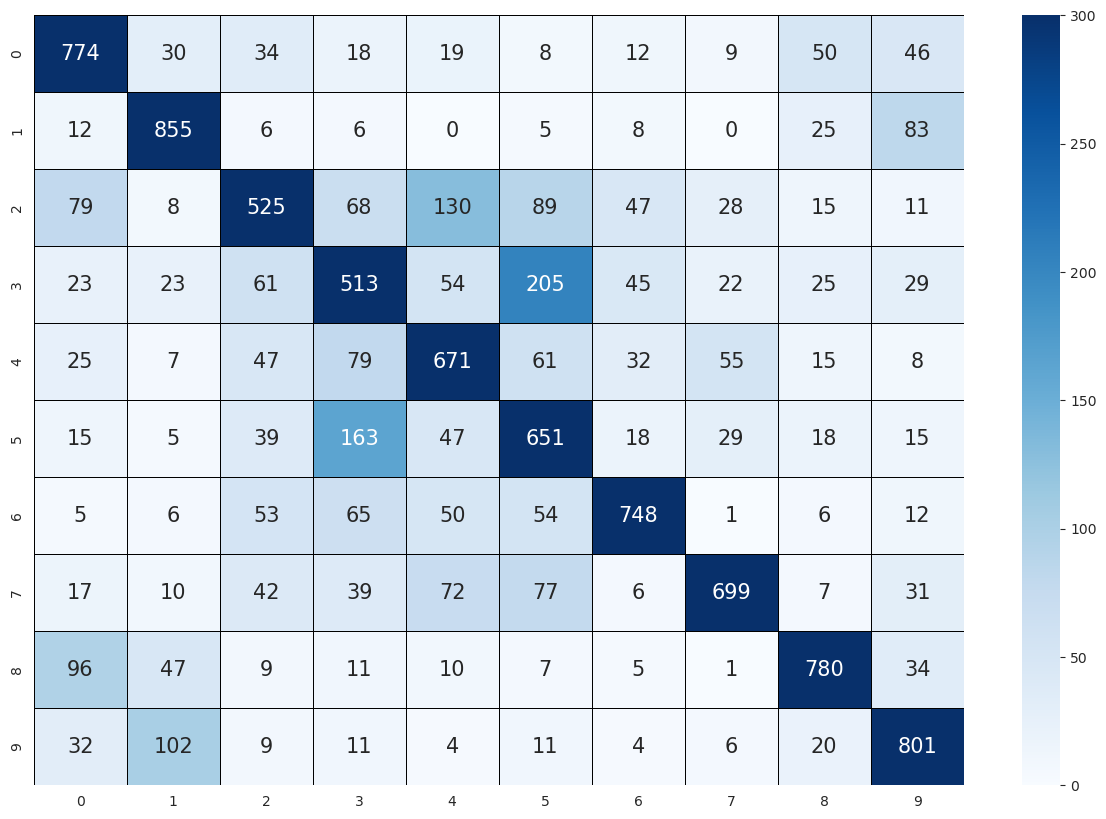

In [53]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

# Modelling-2

In [54]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(32, 32, 3),
        padding="same",
    )
)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [56]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50


2023-04-27 10:09:57.796205: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 13s 7ms/step - loss: 1.4688 - accuracy: 0.4631 - val_loss: 1.0911 - val_accuracy: 0.6198
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0397 - accuracy: 0.6310 - val_loss: 0.8867 - val_accuracy: 0.6942
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8859 - accuracy: 0.6884 - val_loss: 0.8247 - val_accuracy: 0.7119
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7963 - accuracy: 0.7203 - val_loss: 0.8187 - val_accuracy: 0.7259
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7350 - accuracy: 0.7426 - val_loss: 0.7338 - val_accuracy: 0.7493
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6922 - accuracy: 0.7557 - val_loss: 0.7686 - val_accuracy: 0.7365
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6495 - accuracy: 0.7714 - val_loss: 0.7445 - val_accuracy: 0.7

In [57]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.469,0.463,1.091,0.620
1,1.040,0.631,0.887,0.694
2,0.886,0.688,0.825,0.712
3,0.796,0.720,0.819,0.726
4,0.735,0.743,0.734,0.749
5,0.692,0.756,0.769,0.737
6,0.650,0.771,0.744,0.748
7,0.625,0.779,0.692,0.764
8,0.590,0.791,0.707,0.762
9,0.565,0.800,0.733,0.757


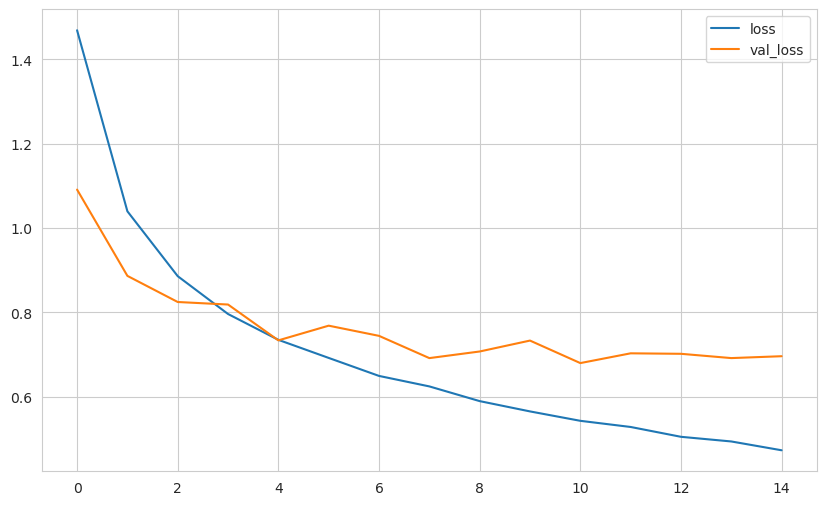

In [58]:
summary[["loss", "val_loss"]].plot()
plt.show()

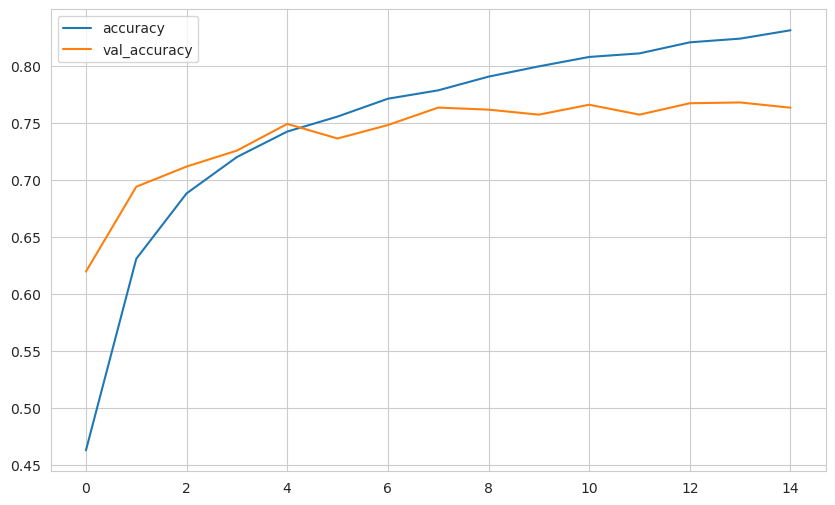

In [59]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [60]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6799 - accuracy: 0.7661


[0.6799417734146118, 0.7660999894142151]

In [61]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6799417734146118
Test accuracy: 0.7660999894142151


In [62]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [63]:
y_pred = np.argmax(pred_prob, axis=1)

In [64]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       0.87      0.88      0.87      1000
           2       0.69      0.64      0.66      1000
           3       0.60      0.58      0.59      1000
           4       0.70      0.76      0.73      1000
           5       0.76      0.55      0.64      1000
           6       0.76      0.88      0.82      1000
           7       0.82      0.81      0.81      1000
           8       0.83      0.89      0.86      1000
           9       0.89      0.81      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000



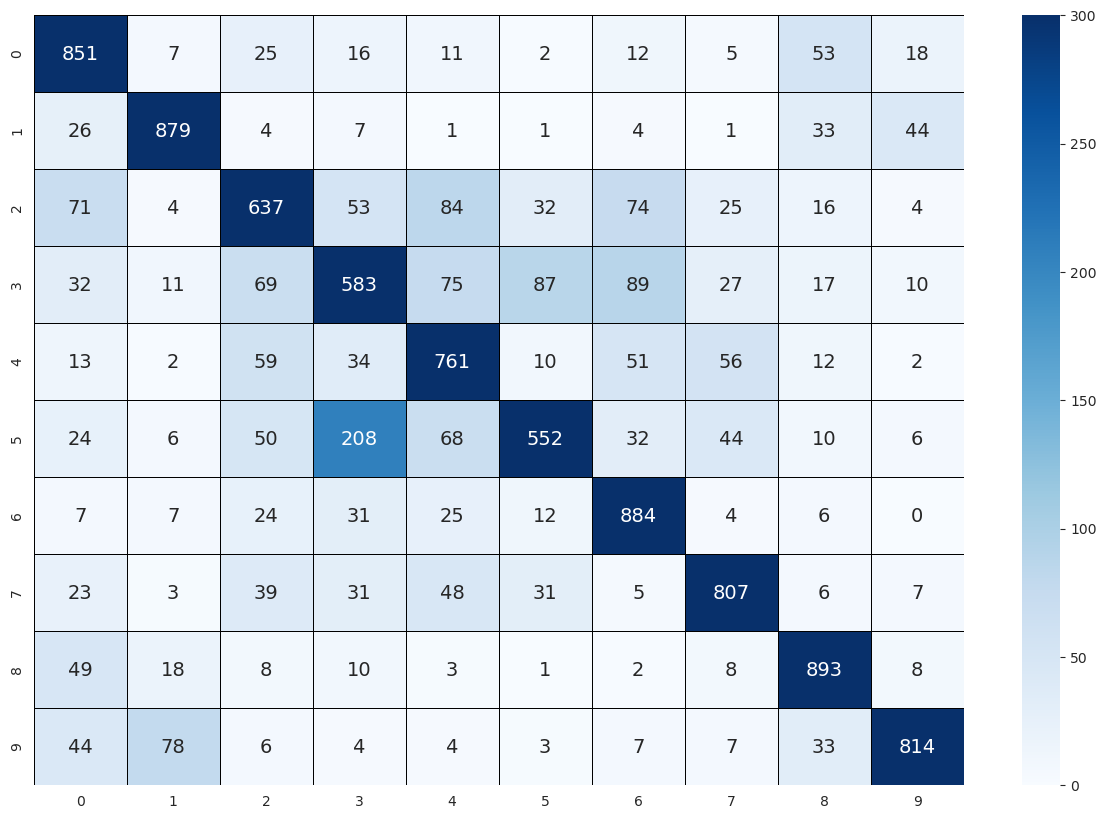

In [66]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

In [67]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [68]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [69]:
model = Sequential()

model.add(
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3))
)
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [71]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50


2023-04-27 10:12:52.054841: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 26s 13ms/step - loss: 1.9220 - accuracy: 0.3177 - val_loss: 1.9088 - val_accuracy: 0.3577
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4151 - accuracy: 0.4980 - val_loss: 1.1765 - val_accuracy: 0.5805
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2102 - accuracy: 0.5802 - val_loss: 1.0158 - val_accuracy: 0.6409
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0849 - accuracy: 0.6323 - val_loss: 0.9355 - val_accuracy: 0.6742
Epoch 5/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0032 - accuracy: 0.6624 - val_loss: 0.8498 - val_accuracy: 0.7035
Epoch 6/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9297 - accuracy: 0.6934 - val_loss: 0.7670 - val_accuracy: 0.7389
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8699 - accuracy: 0.7140 - val_loss: 0.6953 - val_accura

In [72]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
27,0.512,0.837,0.437,0.859
28,0.502,0.841,0.454,0.855
29,0.496,0.842,0.461,0.854
30,0.493,0.843,0.461,0.850
31,0.485,0.844,0.446,0.858


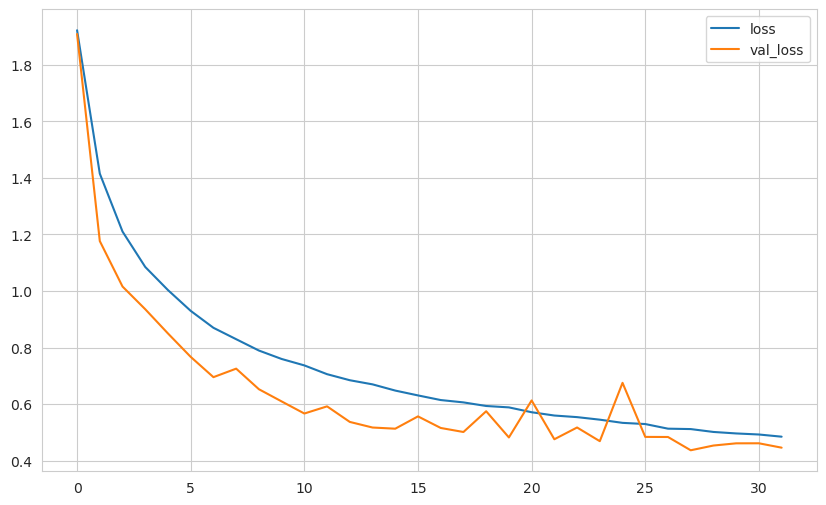

In [73]:
summary[["loss", "val_loss"]].plot()
plt.show()

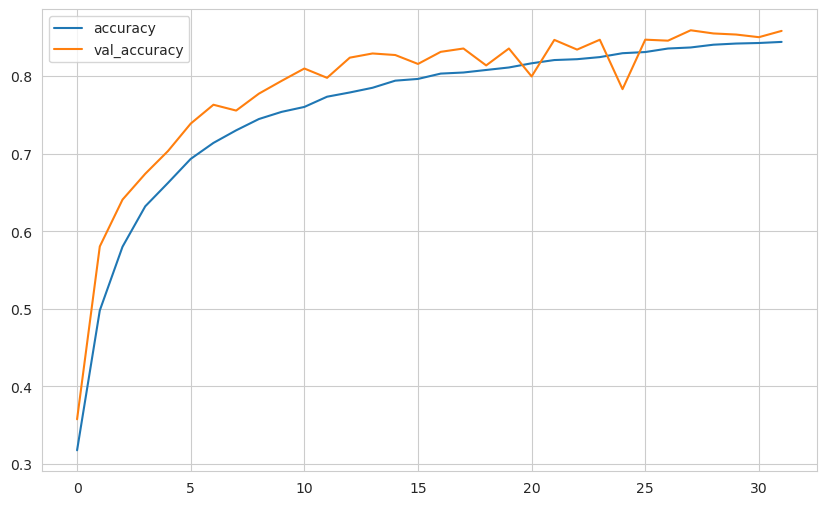

In [74]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [75]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4368 - accuracy: 0.8592


[0.43678149580955505, 0.8592000007629395]

In [76]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.43678149580955505
Test accuracy: 0.8592000007629395


In [77]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [78]:
y_pred = np.argmax(pred_prob, axis=1)

In [79]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1000
           1       0.94      0.94      0.94      1000
           2       0.85      0.74      0.79      1000
           3       0.75      0.70      0.73      1000
           4       0.83      0.86      0.84      1000
           5       0.80      0.80      0.80      1000
           6       0.85      0.92      0.88      1000
           7       0.90      0.90      0.90      1000
           8       0.88      0.94      0.91      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Axes: >

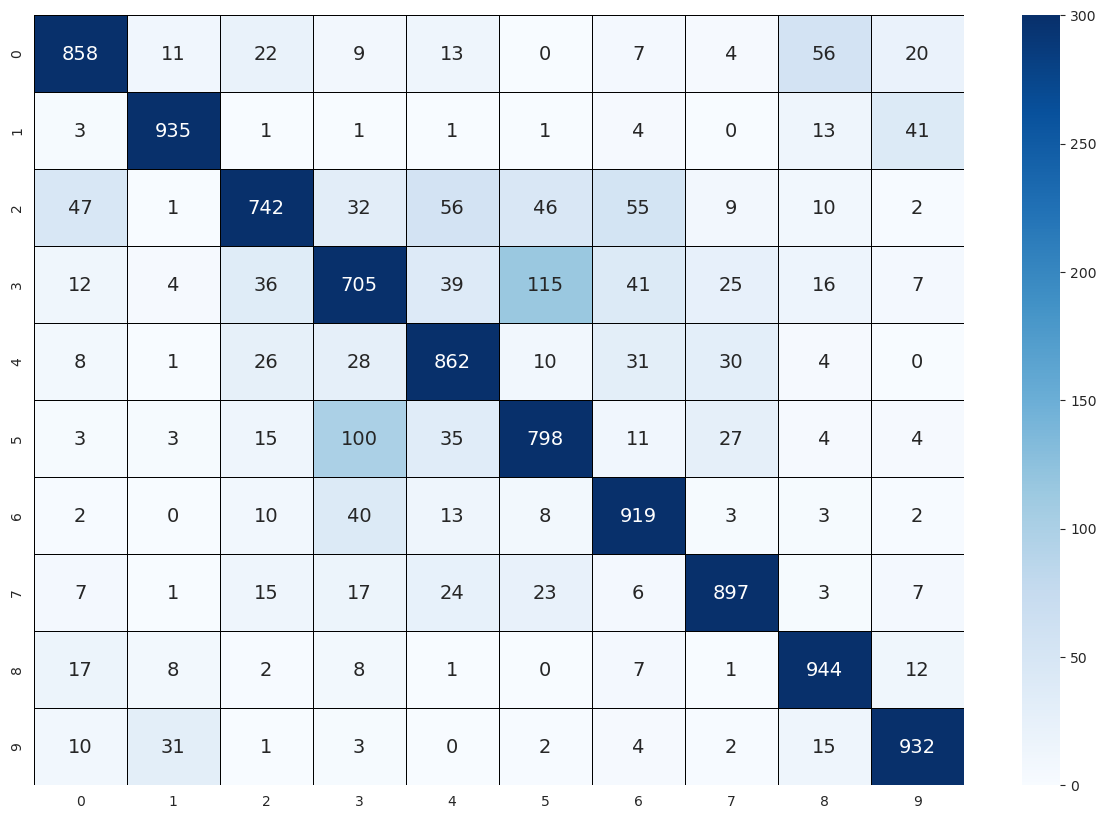

In [81]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)

# Prediction

In [82]:
my_image = X_test[44]

In [83]:
my_image.shape

(32, 32, 3)

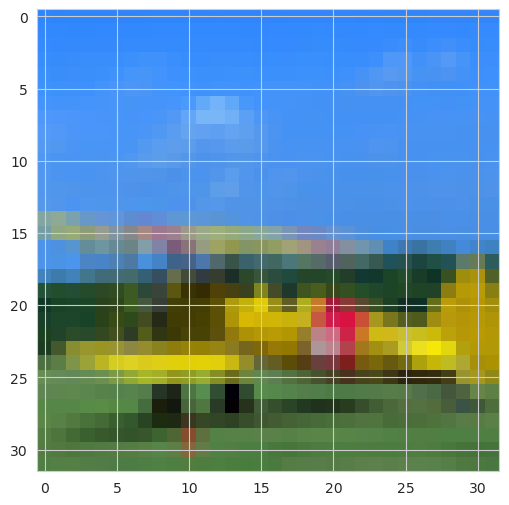

In [84]:
plt.imshow(my_image)
plt.show()

In [85]:
image_prediction = model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 202ms/step


In [86]:
image_prediction

array([[9.9892056e-01, 3.6681598e-05, 5.6550937e-04, 4.5128945e-05,
        5.9059530e-05, 7.7410969e-06, 2.4913827e-05, 3.4314420e-05,
        2.2160920e-04, 8.4516287e-05]], dtype=float32)

In [87]:
np.argmax(image_prediction, axis=1)

array([0])

In [88]:
result = np.argmax(image_prediction, axis=1)

In [89]:
result

array([0])

In [90]:
classes[int(result)]

'airplane'

In [91]:
model.save("cnn-1.h5")

# Load the Saved Model and Get Predictions

In [92]:
model = tf.keras.models.load_model("cnn-1.h5")

In [93]:
X_test[15].shape

(32, 32, 3)

In [94]:
np.expand_dims(X_test[15], axis=0).shape

(1, 32, 32, 3)

In [95]:
pred = model.predict(np.expand_dims(X_test[15], axis=0))

1/1 [==============================] - 0s 126ms/step


In [96]:
np.argmax(pred)

8

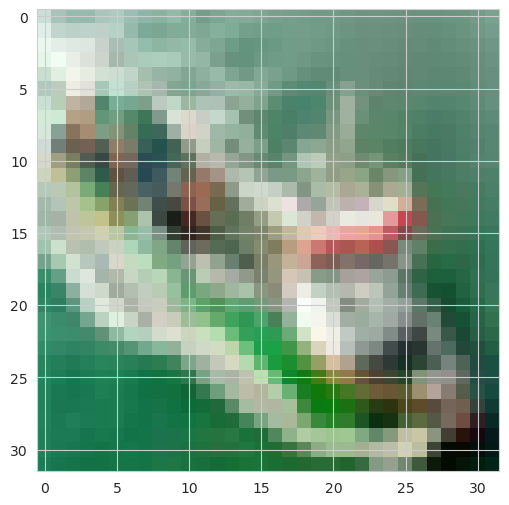

In [97]:
plt.imshow(X_test[15])
plt.show()

In [98]:
classes[8]

'ship'